In [1]:
import cv2
from calculate_patch_switch_frequency import *
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

fshow = Image.fromarray

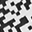

In [6]:
fshow(img)

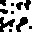

In [2]:
img = cv2.imread("../data/paper_qr/File 015.bmp", cv2.COLOR_BGR2GRAY)
os.path.exists("../data/paper_qr/File 015.bmp")

img = get_square_region(img, (450,150), 32) # 截出小區塊

# 二值化
thres1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 10)
# thres2 = cv2.adaptiveThreshold(qr_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C    , cv2.THRESH_BINARY, 199, 10)
# cv2.imshow('Adaptive Mean', thres1)
# cv2.imshow('Adaptive Gaussian', thres2)
# # De-allocate any associated memory usage  
# if cv2.waitKey(0) & 0xff == 27: 
#     cv2.destroyAllWindows() 
fshow(thres1)

# edge detection
edges = cv2.Canny(thres1, 10, 254)
edges = 255-(edges)
fshow(edges)

kernel = np.ones((3,3), np.uint8)
# closing
# 先侵蝕(侵蝕數值高的-白色) 再 膨脹。
# 閉運算 為 先膨脹 再 腐蝕
dilation = cv2.dilate(thres1, kernel, iterations = 1)
erosion = cv2.erode(dilation, kernel, iterations = 1)

fshow(erosion)

In [5]:
calculate_patch_switch_frequency(erosion, condi=32)

6

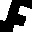

In [43]:
img = cv2.imread("./test.jpg", cv2.COLOR_BGR2GRAY)
fshow(img)

In [12]:
lines = cpsf.calculate_patch_switch_frequency(img, condi=32)

In [13]:
lines.shape

(64, 32)

In [14]:
for line in lines:
    print(line)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
[0 0 0 0 0

In [15]:
res = []
for line in lines:
    res.append(cnt_1d_vec_freq(line))

In [16]:
res

[[20, 12],
 [20, 12],
 [20, 12],
 [21, 11],
 [21, 11],
 [20, 12],
 [18, 14],
 [15, 17],
 [11, 21],
 [8, 24],
 [5, 27],
 [2, 30],
 [32],
 [28, 4],
 [25, 7],
 [25, 7],
 [25, 7],
 [25, 7],
 [12, 2, 11, 7],
 [8, 6, 12, 6],
 [6, 9, 11, 6],
 [6, 9, 11, 6],
 [6, 9, 11, 6],
 [6, 10, 10, 6],
 [7, 9, 7, 9],
 [7, 9, 5, 11],
 [7, 25],
 [8, 24],
 [8, 24],
 [8, 24],
 [9, 23],
 [9, 23],
 [12, 20],
 [12, 20],
 [11, 21],
 [11, 21],
 [11, 21],
 [10, 22],
 [10, 10, 4, 8],
 [10, 10, 7, 5],
 [9, 10, 11, 2],
 [9, 10, 13],
 [9, 10, 13],
 [8, 11, 13],
 [8, 10, 14],
 [8, 10, 14],
 [8, 12, 12],
 [7, 16, 9],
 [7, 19, 6],
 [7, 19, 6],
 [6, 20, 6],
 [6, 20, 6],
 [3, 2, 21, 6],
 [25, 7],
 [25, 7],
 [24, 8],
 [24, 8],
 [14, 5, 5, 8],
 [14, 18],
 [14, 18],
 [13, 19],
 [13, 19],
 [13, 19],
 [13, 19]]

In [17]:
# 不篩選 res 結果長度為 1 的因為根本沒有變化。

In [3]:
# res長度為 3 以上(包括) ，取中位數 
for r in res:
    if len(r) >= 3:
        print("len:", len(r), np.median(r), "cmp", np.mean(r))

NameError: name 'res' is not defined

In [28]:
# 結果使用 res 長度為3以上的做中位數評估比較準確。

In [32]:
eva_median=0
eva_mean=0
eva_number=0
# res長度為 3 以上(包括) ，取中位數 
for r in res:
    if len(r) >= 3:
        eva_median += np.median(r)
        eva_mean += np.mean(r)
        eva_number+=1
eva_median/= eva_number
eva_mean/= eva_number

print(eva_median)
print(eva_mean)

# 平均後無條件進位
print(int(np.ceil((eva_median+eva_mean)/2)))

8.270833333333334
9.22222222222222
9.0


In [34]:
# 總結評估方法
res = []
for line in lines:
    res.append(cnt_1d_vec_freq(line))
    
eva_median=0
eva_mean=0
eva_number=0
# res長度為 3 以上(包括) ，取中位數 
for r in res:
    if len(r) >= 3:
        eva_median += np.median(r)
        eva_mean += np.mean(r)
        eva_number+=1
eva_median/= eva_number
eva_mean/= eva_number

# 平均後無條件進位
#return int(np.ceil((eva_median+eva_mean)/2))
print(int(np.ceil((eva_median+eva_mean)/2)))

8.270833333333334
9.22222222222222
9


6